In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


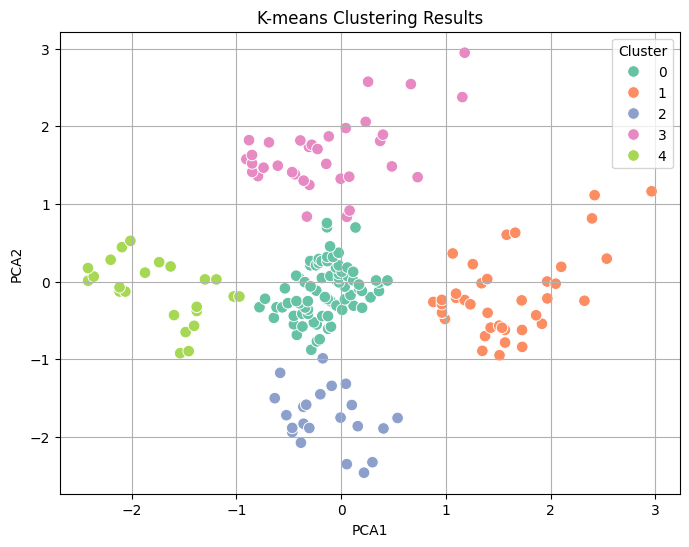

In [ ]:
import numpy as np
np.random.seed(42)
items = ['Clothes', 'Electronics', 'Groceries', 'Cosmetics', 'Shoes']
df['Most_Purchased_Item'] = np.random.choice(items, size=len(df))

# Step 1: K-means clustering on income & spending score
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

# Step 2: Visualize Clusters using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled)
df['PCA1'] = reduced[:, 0]
df['PCA2'] = reduced[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title("K-means Clustering Results")
plt.grid(True)
plt.show()

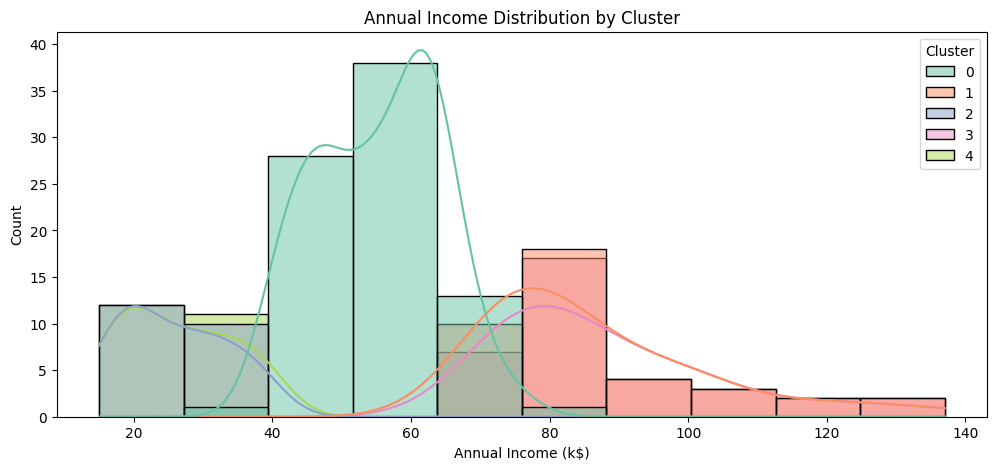

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='Annual Income (k$)', hue='Cluster', kde=True, palette='Set2')
plt.title("Annual Income Distribution by Cluster")
plt.show()

<ipython-input-8-3732281344>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', palette='Set2')


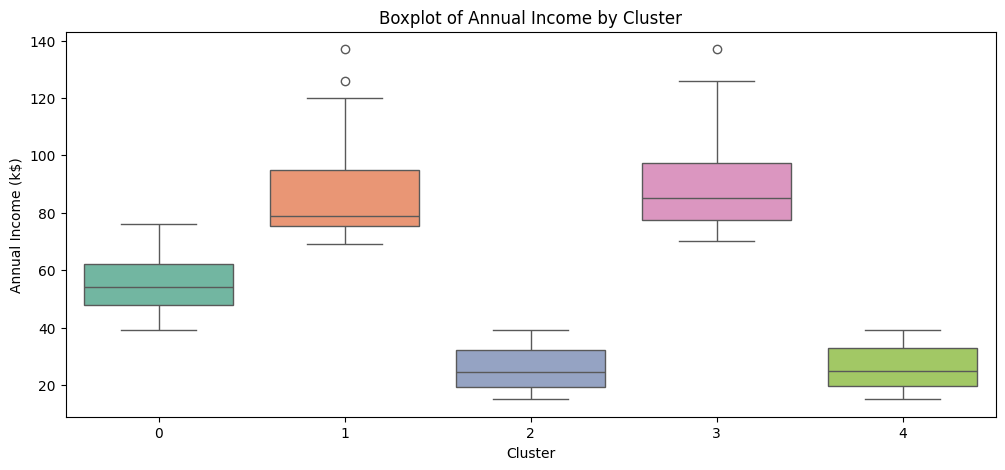

In [ ]:


# Step 4: Boxplots
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', palette='Set2')
plt.title("Boxplot of Annual Income by Cluster")
plt.show()

WE KNOW THAT BOXPLOT IS USED TO HOW OUTLIER THERE IN OUR DATASET SO THAT WE CAN  USE SUITABLE MODEL TO REMOVE OUTLIER GET BETTER ACCURACY  WE ANALYSIS EACH COLUMNS OUTLIER

<ipython-input-9-1973890815>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', palette='Set2')


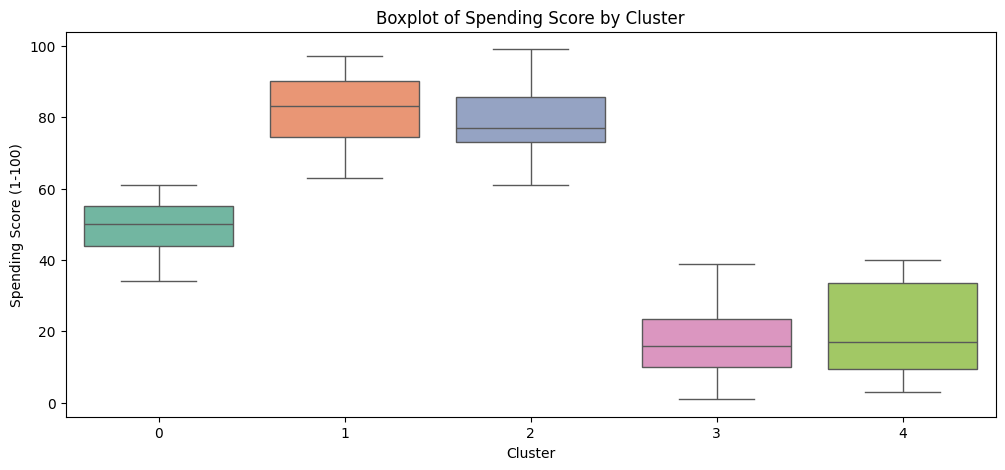

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', palette='Set2')
plt.title("Boxplot of Spending Score by Cluster")
plt.show()

"THIS  IS  CLASSIFICATION AND CONFUSION MATRIX OF K-MEANS CLUSTERING THIS IS BECAUSE OF TO DETERMINE OUR  MODEL THROUGH THIS WE CAN KNOW OUR ACCURACY OF MODEL"

In [ ]:
true_labels = df['Cluster']
predicted_labels = kmeans.labels_

print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))


Confusion Matrix:
[[81  0  0  0  0]
 [ 0 39  0  0  0]
 [ 0  0 22  0  0]
 [ 0  0  0 35  0]
 [ 0  0  0  0 23]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        23

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



ANALYZE WHICH ITEM PURCHASED MORE FROM STORE THIS IS POSSIBLEBY DATAFRAME THAT IS DF

<ipython-input-10-1660452219>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='viridis')


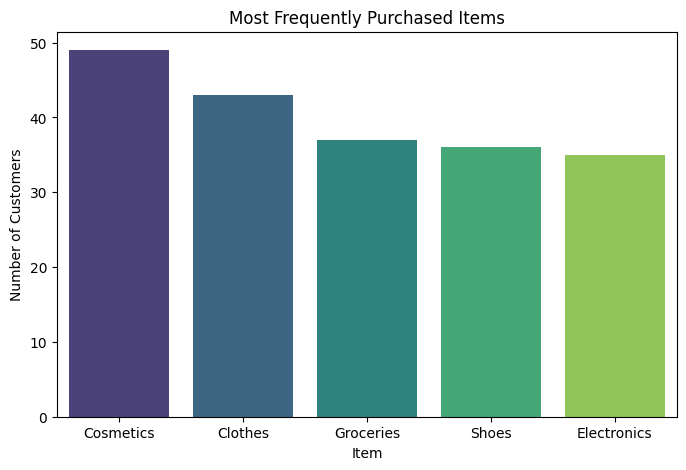

In [ ]:

item_counts = df['Most_Purchased_Item'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=item_counts.index, y=item_counts.values, palette='viridis')
plt.title("Most Frequently Purchased Items")
plt.xlabel("Item")
plt.ylabel("Number of Customers")
plt.show()

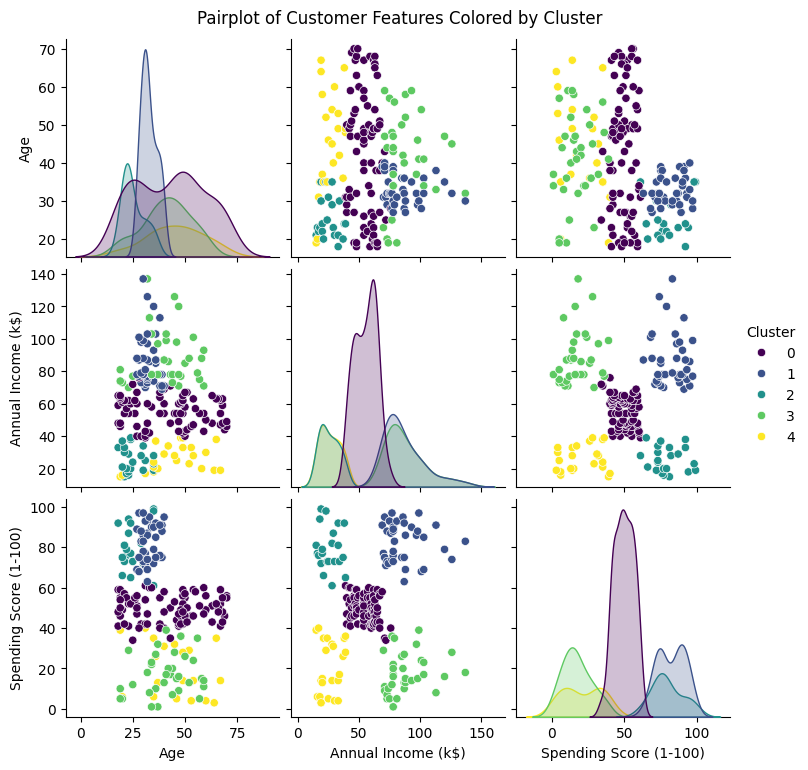

In [ ]:
# Select the features to visualize in pairplot
pairplot_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create pairplot using seaborn
sns.pairplot(df[pairplot_features + ['Cluster']], hue='Cluster', palette='viridis')
plt.suptitle("Pairplot of Customer Features Colored by Cluster", y=1.02)
plt.show()


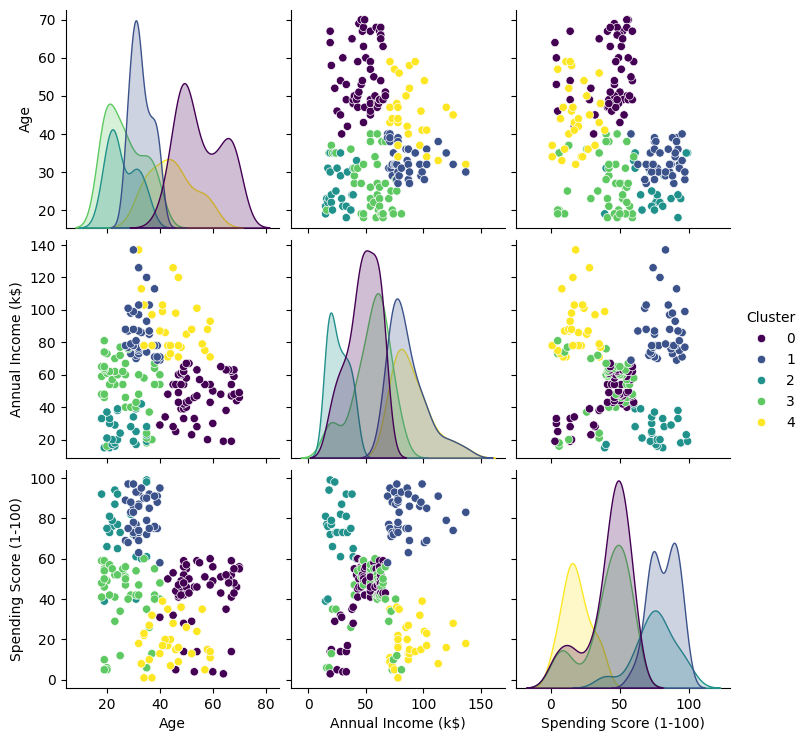

In [ ]:
sns.pairplot(data, hue='Cluster', palette='viridis', vars=features)
plt.show()


/tmp/ipykernel_7090/4192266164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
/tmp/ipykernel_7090/4192266164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
/tmp/ipykernel_7090/4192266164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')


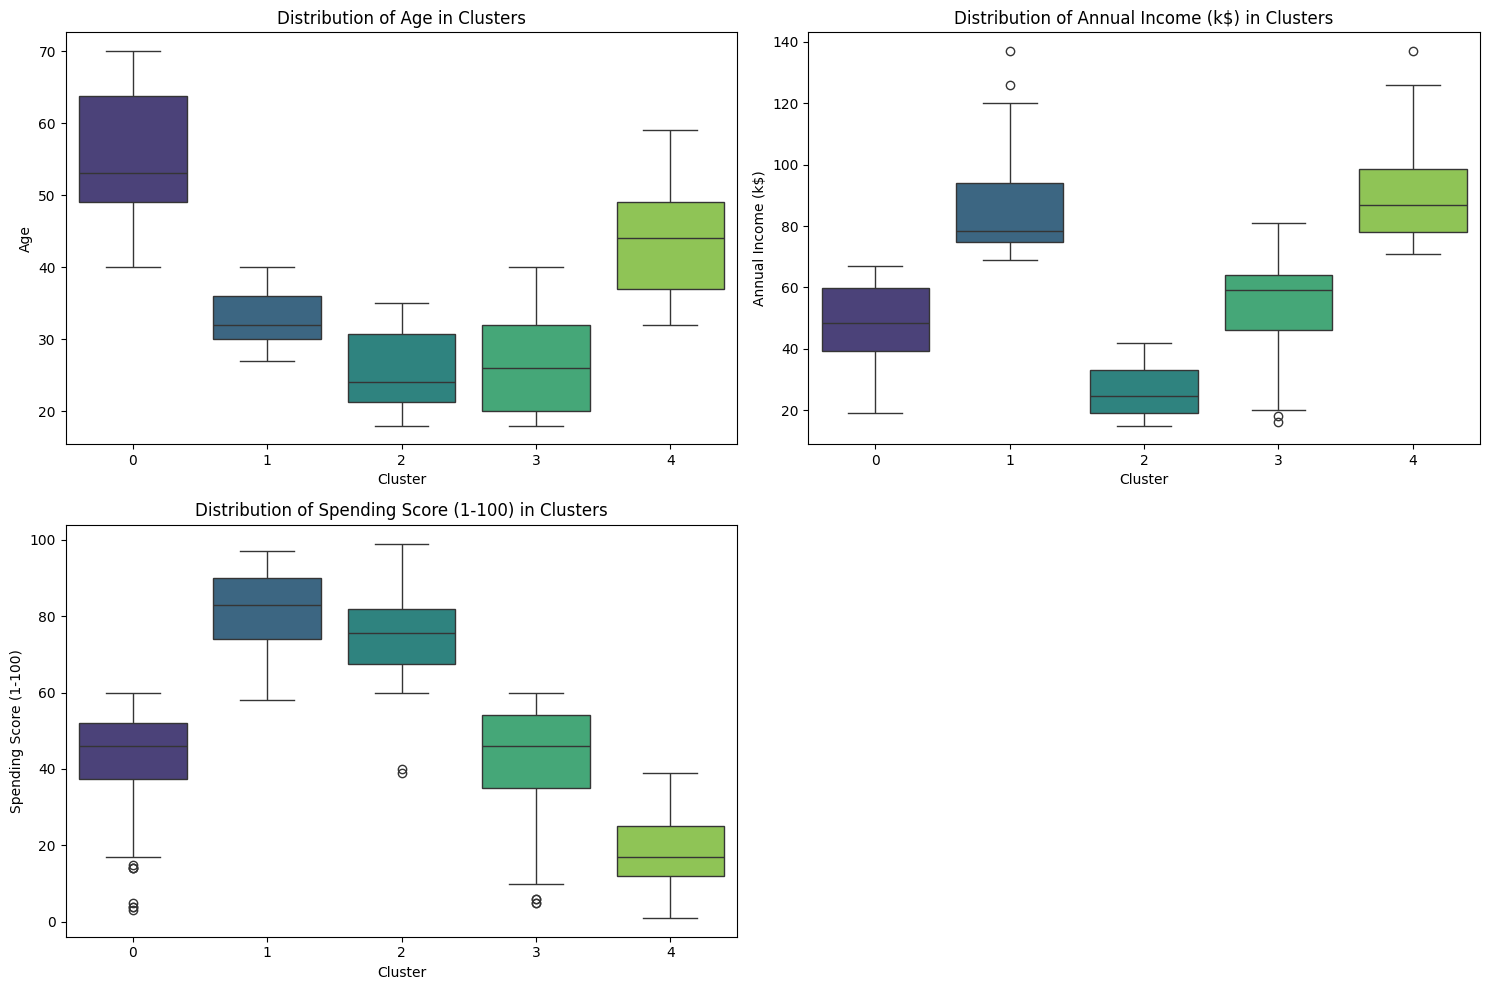

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature} in Clusters')
plt.tight_layout()
plt.show()